**INICIO**
> ANÁLISIS DE DATOS EN LA PREVENCIÓN DE ATAQUES DE PHISHING CON TÉCNICAS DE MINERÍA DE DATOS PARA EL ISTEL

**AUTOR**
> Edison Geovanny Cuñez Zaruma

**TUTORA**
>Lcda. María Elena Navarrete Vinces MSc.

**DATOS DEL DATASET**

SPAM DETECTION DATASET:
> [VER DATASET](https://huggingface.co/datasets/softecapps/spam_ham_spanish)


**ALGORITMO RANDOM FOREST**
> [VER PAPER](https://github.com/istel-edu/spam_detection/blob/main/algoritmos/RamdomForest.pdf)


In [1]:
import numpy as np
import pyarrow.parquet as pq
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
!git clone https://github.com/istel-edu/spam_detection.git

Cloning into 'spam_detection'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 60 (delta 14), reused 43 (delta 6), pack-reused 0
Receiving objects: 100% (60/60), 4.58 MiB | 13.93 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [3]:
# Cargar los datasets
train_data = pq.read_table('/content/spam_detection/spanish_dataset/train.parquet').to_pandas()
test_data = pq.read_table('/content/spam_detection/spanish_dataset/test.parquet').to_pandas()

In [4]:
# Preprocesamiento de datos
train_data['mensaje'] = train_data['mensaje'].str.lower()
train_data['mensaje'] = train_data['mensaje'].str.replace('[^a-zA-Z0-9\s]', '')
test_data['mensaje'] = test_data['mensaje'].str.lower()
test_data['mensaje'] = test_data['mensaje'].str.replace('[^a-zA-Z0-9\s]', '')

# Dividir los datos en características (X) y etiquetas (y)
X_train = train_data['mensaje']
y_train = train_data['tipo']
X_test = test_data['mensaje']
y_test = test_data['tipo']

# Convertir el texto en una matriz de características
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [5]:
# Crear y entrenar el modelo Random Forest (1-100)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Obtener el número de características del modelo entrenado
num_features = model.n_features_in_
print("\nNúmero de características del modelo entrenado:", num_features)

# Obtener las clases del modelo entrenado
classes = model.classes_
print("Clases del modelo entrenado:", classes)

# Obtener el número de clases del modelo entrenado
num_classes = len(classes)
print("Número de clases del modelo entrenado:", num_classes)

print("\nModelo Random Forest entrenado exitosamente.")


Número de características del modelo entrenado: 1482
Clases del modelo entrenado: ['ham' 'spam']
Número de clases del modelo entrenado: 2

Modelo Random Forest entrenado exitosamente.


In [6]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

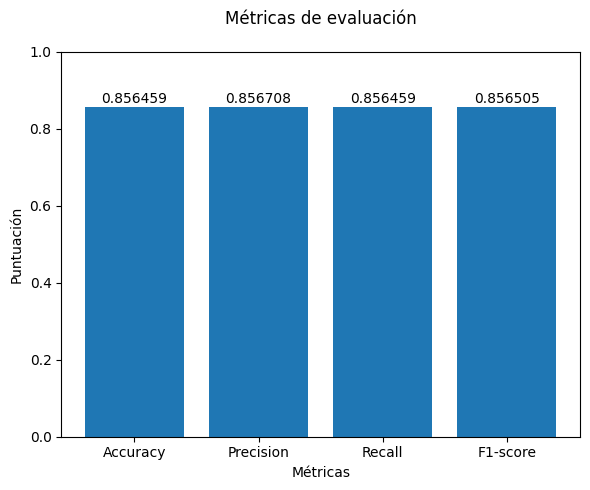


Métricas de evaluación:
1. Accuracy (Exactitud): 0.8564593301435407
   Representa la proporción de predicciones correctas del modelo.
   Se calcula como (Verdaderos Positivos + Verdaderos Negativos) / Total de muestras.
   Una accuracy alta indica que el modelo clasifica correctamente la mayoría de las muestras.

2. Precision (Precisión): 0.8567083408957197
   Representa la proporción de predicciones positivas correctas del modelo.
   Se calcula como Verdaderos Positivos / (Verdaderos Positivos + Falsos Positivos).
   Una precision alta indica que cuando el modelo predice una clase positiva, es muy probable que sea correcta.

3. Recall (Exhaustividad): 0.8564593301435407
   Representa la proporción de muestras positivas reales que el modelo identifica correctamente.
   Se calcula como Verdaderos Positivos / (Verdaderos Positivos + Falsos Negativos).
   Un recall alto indica que el modelo es capaz de identificar la mayoría de las muestras positivas.

4. F1-score (Puntuación F1): 0.8565

In [7]:
# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Crear un gráfico de barras para visualizar las métricas
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
scores = [accuracy, precision, recall, f1]

plt.figure(figsize=(6, 5))
plt.bar(metrics, scores)
plt.ylim([0, 1])
plt.title('Métricas de evaluación', y=1.05)  # Ajustar la posición del título
plt.xlabel('Métricas')
plt.ylabel('Puntuación')

# Añadir los números redondeados a dos decimales en las columnas
for i, v in enumerate(scores):
    plt.text(i, v + 0.01, f'{v:.6f}', ha='center')

plt.tight_layout()  # Ajustar el espaciado entre los elementos del gráfico
plt.show()


print("\nMétricas de evaluación:")
print("1. Accuracy (Exactitud):", accuracy)
print("   Representa la proporción de predicciones correctas del modelo.")
print("   Se calcula como (Verdaderos Positivos + Verdaderos Negativos) / Total de muestras.")
print("   Una accuracy alta indica que el modelo clasifica correctamente la mayoría de las muestras.")

print("\n2. Precision (Precisión):", precision)
print("   Representa la proporción de predicciones positivas correctas del modelo.")
print("   Se calcula como Verdaderos Positivos / (Verdaderos Positivos + Falsos Positivos).")
print("   Una precision alta indica que cuando el modelo predice una clase positiva, es muy probable que sea correcta.")

print("\n3. Recall (Exhaustividad):", recall)
print("   Representa la proporción de muestras positivas reales que el modelo identifica correctamente.")
print("   Se calcula como Verdaderos Positivos / (Verdaderos Positivos + Falsos Negativos).")
print("   Un recall alto indica que el modelo es capaz de identificar la mayoría de las muestras positivas.")

print("\n4. F1-score (Puntuación F1):", f1)
print("   Es una media armónica de la precision y el recall.")
print("   Se calcula como 2 * (Precision * Recall) / (Precision + Recall).")
print("   El F1-score es útil cuando se busca un equilibrio entre la precision y el recall.")
print("   Un F1-score alto indica que el modelo tiene un buen rendimiento tanto en precision como en recall.")

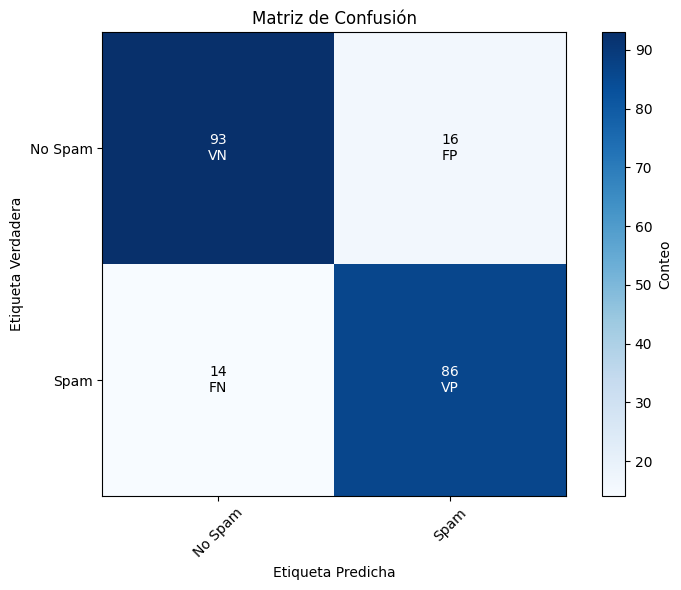

La matriz de confusión es una tabla que muestra el rendimiento de un modelo de clasificación.

Las celdas de la matriz de confusión representan:
- Verdaderos Positivos (VP): Instancias de spam correctamente clasificadas como spam.
- Falsos Positivos (FP): Instancias de no spam incorrectamente clasificadas como spam.
- Falsos Negativos (FN): Instancias de spam incorrectamente clasificadas como no spam.
- Verdaderos Negativos (VN): Instancias de no spam correctamente clasificadas como no spam.

Una matriz de confusión ideal tendría valores altos en la diagonal principal (VP y VN) y valores bajos fuera de ella (FP y FN).
Esto indicaría que el modelo clasifica correctamente la mayoría de las instancias de cada clase.


In [8]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar(label='Conteo')
classes = ['No Spam', 'Spam']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.tight_layout()

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if i == 0 and j == 0:
            label = f"{cm[i, j]}\nVN"
        elif i == 0 and j == 1:
            label = f"{cm[i, j]}\nFP"
        elif i == 1 and j == 0:
            label = f"{cm[i, j]}\nFN"
        else:
            label = f"{cm[i, j]}\nVP"

        plt.text(j, i, label, ha="center", va="center", color="white" if cm[i, j] > thresh else "black")

plt.show()

print("La matriz de confusión es una tabla que muestra el rendimiento de un modelo de clasificación.")
print("\nLas celdas de la matriz de confusión representan:")
print("- Verdaderos Positivos (VP): Instancias de spam correctamente clasificadas como spam.")
print("- Falsos Positivos (FP): Instancias de no spam incorrectamente clasificadas como spam.")
print("- Falsos Negativos (FN): Instancias de spam incorrectamente clasificadas como no spam.")
print("- Verdaderos Negativos (VN): Instancias de no spam correctamente clasificadas como no spam.")
print("\nUna matriz de confusión ideal tendría valores altos en la diagonal principal (VP y VN) y valores bajos fuera de ella (FP y FN).")
print("Esto indicaría que el modelo clasifica correctamente la mayoría de las instancias de cada clase.")


In [9]:
# Ejemplo de predicción
email = ["Tu devolucion esta siendo procesada"]
email_features = vectorizer.transform(email)
prediction = model.predict(email_features)
print("El correo electrónico uno es:", prediction)

email = ["Envia tu numero de tarjeta para ganar un premio"]
email_features = vectorizer.transform(email)
prediction = model.predict(email_features)
print("El correo electrónico dos es:", prediction)

El correo electrónico uno es: ['ham']
El correo electrónico dos es: ['ham']
